Imports

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Functions

In [2]:
def crop_barcode(img):
    # Find contours in the binary image
    contours, _ = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    # Find the horizontal limits of the barcode
    x_min = min([cv.boundingRect(contour)[0] for contour in contours])  # Leftmost x-coordinate
    x_max = max([cv.boundingRect(contour)[0] + cv.boundingRect(contour)[2] for contour in contours])  # Rightmost x-coordinate

    # Assume the largest contour corresponds to the vertical extent of the barcode
    largest_contour = max(contours, key=cv.contourArea)
    _, y, _, h = cv.boundingRect(largest_contour)  # Get the y and height (vertical cropping)

    # Crop the image so that only the barcode is visible
    cropped_img = img[y:y + h, x_min:x_max]
    
    # Draw the bounding rectangle of the largest contour in green
    cv.rectangle(img, (x_min, y), (x_max, y + h), (0, 255, 0), 8)

    # Draw all contours in red
    contour_img = cv.cvtColor(cv.bitwise_not(img), cv.COLOR_GRAY2BGR)  # Convert to BGR for colored drawing
    cv.drawContours(contour_img, contours, -1, (255, 0, 0), 4)  # Draw all contours in red

    return cropped_img, contour_img

def crop_barcode2(img):

    # Find contours in the binary image
    contours, _ = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

    # Assume the largest contour probably corresponds to a wide bar in the barcode
    largest_contour = max(contours, key=cv.contourArea)
    largest_contour_area = cv.contourArea(largest_contour)

    # Find the horizontal limits of the barcode
    x_min = None
    x_max = None
    for contour in contours:
        contour_area = cv.contourArea(contour)
        if contour_area >= 0.2 * largest_contour_area:  # Check if the contour area is at least 20% of the largest contour
            x, _, w, _ = cv.boundingRect(contour)
            if x_min is None or x < x_min:
                x_min = x
            if x_max is None or x + w > x_max:
                x_max = x + w

    # If no valid contours are found, use the entire width of the image
    if x_min is None or x_max is None:
        x_min = 0
        x_max = img.shape[1]

    # Get the vertical limits from the largest contour
    _, y, _, h = cv.boundingRect(largest_contour)

    # Crop the image so that only the barcode is visible
    cropped_img = img[y:y + h, x_min:x_max+w]

    # Draw the bounding rectangle of the largest contour in green
    cv.rectangle(img, (x_min, y), (x_max, y + h), (0, 255, 0), 10)

    # Draw all contours in red
    contour_img = cv.cvtColor(cv.bitwise_not(img), cv.COLOR_GRAY2BGR)  # Convert to BGR for colored drawing
    cv.drawContours(contour_img, contours, -1, (255, 0, 0), 4)  # Draw all contours in red

    return cropped_img, contour_img

def crop_barcode3(img):
    # Find contours in the binary image
    contours, _ = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

    # Assume the largest contour corresponds to the barcode
    largest_contour = max(contours, key=cv.contourArea)
    largest_contour_area = cv.contourArea(largest_contour)

    # Initialize variables to store the leftmost and rightmost contours
    leftmost_contour = None
    rightmost_contour = None
    x_min = float('inf')
    x_max = float('-inf')

    # Find the leftmost and rightmost contours
    for contour in contours:
        contour_area = cv.contourArea(contour)
        if contour_area >= 0.2 * largest_contour_area:  # Check if the contour area is significant
            x, _, w, _ = cv.boundingRect(contour)
            if x < x_min:
                x_min = x
                leftmost_contour = contour
            if x + w > x_max:  # Use x to get the far-right edge of the contour
                x_max = x + w
                rightmost_contour = contour

    x_min, _, _, _ = cv.boundingRect(leftmost_contour)
    x_max, _, w, _ = cv.boundingRect(rightmost_contour)

    # Get the vertical limits from the largest contour
    _, y, _, h = cv.boundingRect(largest_contour)

    # Crop the image so that only the barcode is visible
    cropped_img = img[y:y + h, x_min:x_max+w]

    # Draw the bounding rectangle of the largest contour in green
    cv.rectangle(img, (x_min, y), (x_max, y + h), (0, 255, 0), 10)

    # Draw all contours in red
    contour_img = cv.cvtColor(cv.bitwise_not(img), cv.COLOR_GRAY2BGR)  # Convert to BGR for colored drawing
    cv.drawContours(contour_img, contours, -1, (255, 0, 0), 4)  # Draw all contours in red

    return cropped_img, contour_img

def crop_barcode4(img):
    """
    Crops the image to isolate the barcode using the leftmost and rightmost bounding rectangles.

    Parameters:
        img (numpy.ndarray): Input binary image.

    Returns:
        tuple: Cropped image and visualization of contours with bounding rectangles.
    """
    # Find contours in the binary image
    contours, _ = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    # Assume the largest contour corresponds to the barcode
    largest_contour = max(contours, key=cv.contourArea)
    largest_contour_area = cv.contourArea(largest_contour)

    # Initialize variables for leftmost and rightmost bounding boxes
    x_min = float('inf')
    x_max = float('-inf')
    y_min, y_max = 0, 0  # For vertical cropping

    # Iterate through contours to find the leftmost and rightmost bounding boxes
    for contour in contours:
        contour_area = cv.contourArea(contour)
        if contour_area >= 0.05 * largest_contour_area:  # Only consider significant contours
            x, y, w, h = cv.boundingRect(contour)
            if x < x_min:  # Update leftmost bounding box
                x_min = x
                y_min = y
                leftmost_rect = (x, y, w, h)
            if x + w > x_max:  # Update rightmost bounding box
                x_max = x + w
                y_max = y + h
                rightmost_rect = (x, y, w, h)

    # Use the vertical bounds from the largest contour
    _, y, _, h = cv.boundingRect(largest_contour)

    # Crop the image using the determined bounds
    cropped_img = img[y:y + h, x_min:x_max]

    # Visualization: Draw bounding rectangles
    contour_img = cv.cvtColor(cv.bitwise_not(img), cv.COLOR_GRAY2BGR)  # Convert to BGR
    if 'leftmost_rect' in locals():
        lx, ly, lw, lh = leftmost_rect
        cv.rectangle(contour_img, (lx, ly), (lx + lw, ly + lh), (0, 255, 0), 2)  # Green for leftmost
    if 'rightmost_rect' in locals():
        rx, ry, rw, rh = rightmost_rect
        cv.rectangle(contour_img, (rx, ry), (rx + rw, ry + rh), (255, 0, 0), 2)  # Red for rightmost

    return cropped_img, contour_img

def crop_barcode5(img):
    """
    Crops the image to isolate the barcode using the horizontal limits derived from bounding rectangles.

    Parameters:
        img (numpy.ndarray): Input binary image.

    Returns:
        tuple: Cropped image and visualization of contours with bounding rectangles.
    """
    # Find contours in the binary image
    contours, _ = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    # Assume the largest contour corresponds to the barcode
    largest_contour = max(contours, key=cv.contourArea)
    largest_contour_area = cv.contourArea(largest_contour)

    # Filter significant contours based on area (at least 10% of the largest contour's area)
    significant_contours = [
        contour for contour in contours if cv.contourArea(contour) >= 0.1 * largest_contour_area
    ]

    # Find the horizontal limits of the barcode
    if significant_contours:
        x_min = min([cv.boundingRect(contour)[0] for contour in significant_contours])  # Leftmost x-coordinate
        x_max = max(
            [cv.boundingRect(contour)[0] + cv.boundingRect(contour)[2] for contour in significant_contours]
        )  # Rightmost x-coordinate
    else:
        # If no significant contours are found, use the entire image width
        x_min = 0
        x_max = img.shape[1]

    # Get the vertical limits from the largest contour
    _, y, _, h = cv.boundingRect(largest_contour)

    # Crop the image using the determined bounds
    cropped_img = img[y:y + h, x_min:x_max]

    # Visualization: Draw bounding rectangles and limits
    contour_img = cv.cvtColor(cv.bitwise_not(img), cv.COLOR_GRAY2BGR)  # Convert to BGR
    for contour in significant_contours:
        x, y, w, h = cv.boundingRect(contour)
        cv.rectangle(contour_img, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Red for all significant bounding boxes

    # Highlight the cropping region
    cv.rectangle(contour_img, (x_min, y), (x_max, y + h), (0, 255, 0), 2)  # Green rectangle for cropping

    return cropped_img, contour_img



def display_image(img, title):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    # Draw border around the image
    plt.gca().add_patch(plt.Rectangle((0, 0), img.shape[1], img.shape[0], fill=None, edgecolor='blue', linewidth=2))
    plt.axis('off')
    plt.show()

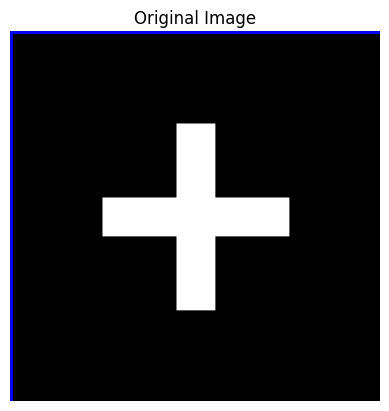

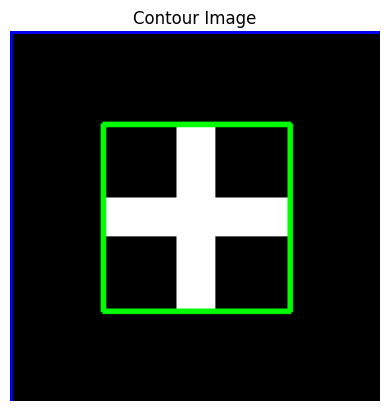

In [3]:
# Create a blank black image
image = np.zeros((200, 200), dtype=np.uint8)

# Draw a white plus sign (+)
cv.rectangle(image, (90, 50), (110, 150), 255, -1)  # Vertical bar
cv.rectangle(image, (50, 90), (150, 110), 255, -1)  # Horizontal bar

# Find contours
contours, _ = cv.findContours(image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Create a color image to draw the bounding rectangle
bounding_rect_image = cv.cvtColor(image, cv.COLOR_GRAY2BGR)

# Draw the bounding rectangle for each contour
for contour in contours:
    x, y, w, h = cv.boundingRect(contour)  # Get bounding rectangle
    cv.rectangle(bounding_rect_image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw rectangle in green


# Display the results
display_image(image, 'Original Image')
display_image(bounding_rect_image, 'Contour Image')

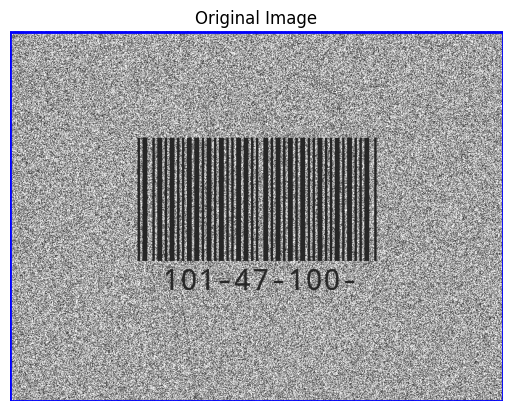

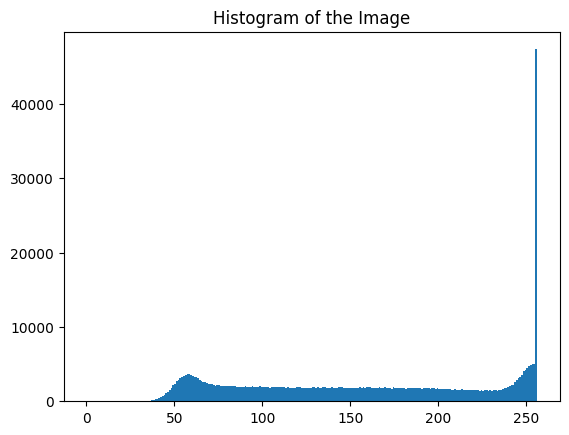

Average pixel value: 157.6206875


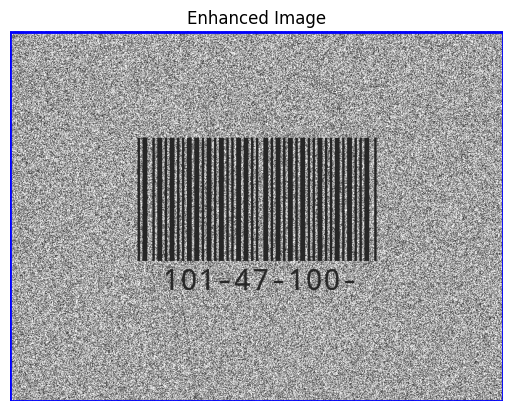

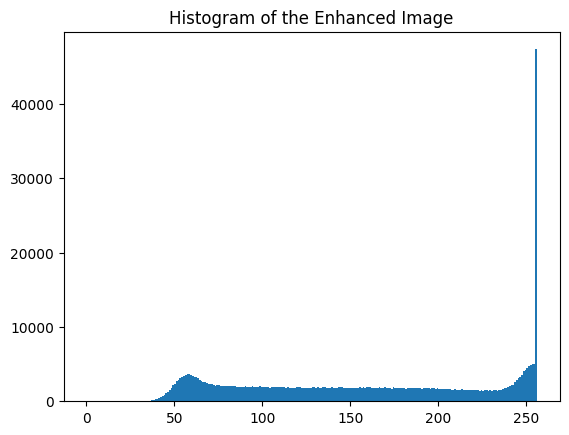

In [4]:
# Read the image
# img = cv.imread('Samples/image1.jpg', cv.IMREAD_GRAYSCALE)
# img = cv.imread('Samples/Test Cases/01 - lol easy.jpg', cv.IMREAD_GRAYSCALE)
# img = cv.imread('Samples/Test Cases/02 - still easy.jpg', cv.IMREAD_GRAYSCALE)
# img = cv.imread('Samples/Test Cases/03 - eda ya3am ew3a soba3ak mathazarsh.jpg', cv.IMREAD_GRAYSCALE)
# img = cv.imread('Samples/Test Cases/04 - fen el nadara.jpg', cv.IMREAD_GRAYSCALE)
# img = cv.imread('Samples/Test Cases/05 - meen taffa el nour!!!.jpg', cv.IMREAD_GRAYSCALE)
# img = cv.imread('Samples/Test Cases/06 - meen fata7 el nour 333eenaaayy.jpg', cv.IMREAD_GRAYSCALE)
img = cv.imread('Samples/Test Cases/07 - mal7 w felfel.jpg', cv.IMREAD_GRAYSCALE)
# img = cv.imread('Samples/Test Cases/08 - compresso espresso.jpg', cv.IMREAD_GRAYSCALE)
# img = cv.imread('Samples/Test Cases/09 - e3del el sora ya3ammm.jpg', cv.IMREAD_GRAYSCALE)
# img = cv.imread('Samples/Test Cases/10 - wen el kontraastttt.jpg', cv.IMREAD_GRAYSCALE)
# img = cv.imread('Samples/Test Cases/11 - bayza 5ales di bsara7a.jpg', cv.IMREAD_GRAYSCALE)

# Display the image 
display_image(img, 'Original Image')

# Plot the histogram of the image
plt.hist(img.ravel(), 256, [0, 256])
plt.title('Histogram of the Image')
plt.show()

# define the alpha and beta
alpha = 10 # Contrast control
beta = 100 # Brightness control


average_pixel_value = np.average(img)
print(f'Average pixel value: {average_pixel_value}')

# Display the image after enhancing the contrast
display_image(img, 'Enhanced Image')

plt.hist(img.ravel(), 256, [0, 256])
plt.title('Histogram of the Enhanced Image')
plt.show()

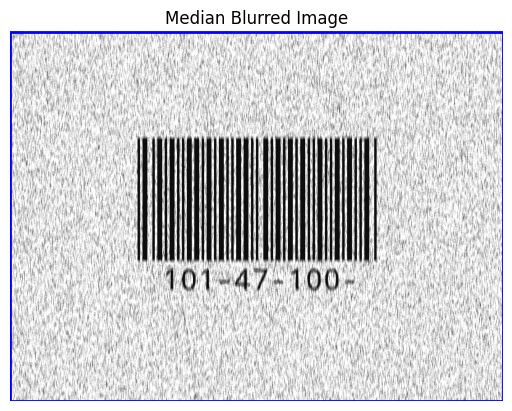

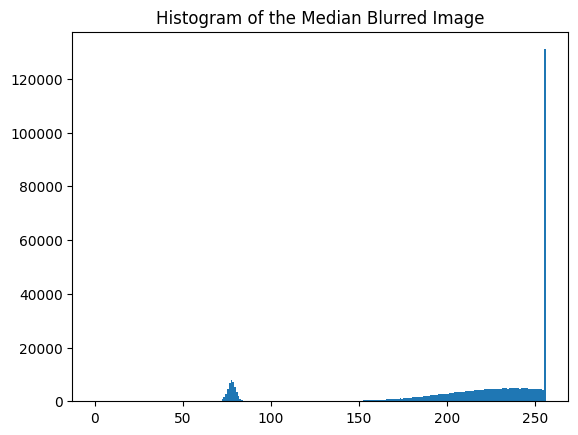

In [5]:
# Apply Median Filter vertically only
kernel = np.ones((7,1),np.float32)/5
median_blurred_img = cv.filter2D(img,-1,kernel)

# Display the image
display_image(median_blurred_img, 'Median Blurred Image')

plt.hist(median_blurred_img.ravel(), 256, [0, 256])
plt.title('Histogram of the Median Blurred Image')
plt.show()

### **Resizing and Binarizing**

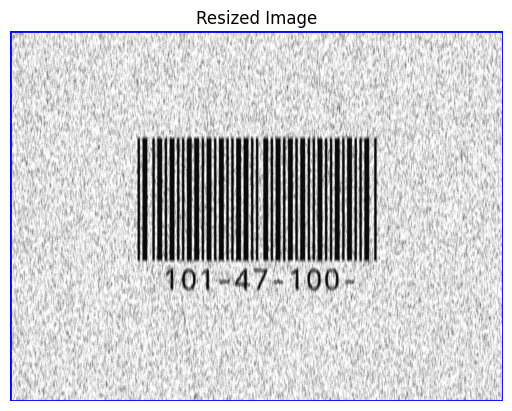

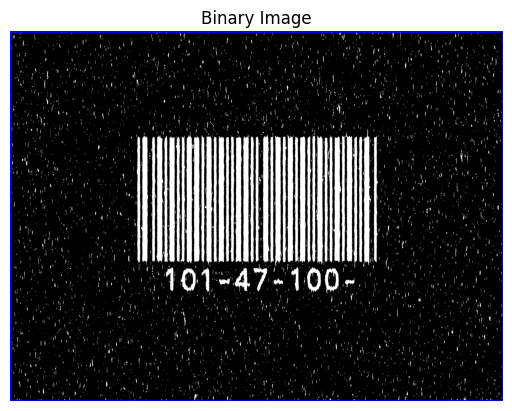

In [6]:
# Resize the image to increase its dimensions
scale_factor = 4  # Adjust the scale factor as needed
resized_img = cv.resize(median_blurred_img, (median_blurred_img.shape[1] * scale_factor, median_blurred_img.shape[0] * scale_factor))
display_image(resized_img, 'Resized Image')
# Binarize the image using a threshold
_, binary_img = cv.threshold(resized_img, 180, 255, cv.THRESH_BINARY_INV)

# Display the image
display_image(binary_img, 'Binary Image')

### **Morphological Opening**

In [7]:
kernel_height1 = 13
kernel_width1 = 13  
kernel1 = np.zeros((kernel_height1, kernel_width1), np.uint8)
kernel1[:, kernel_width1 // 2] = 1

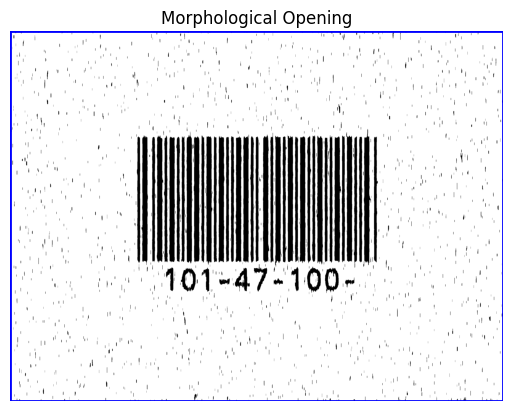

In [8]:
opened_img = cv.morphologyEx(binary_img, cv.MORPH_OPEN, kernel1)
display_image(cv.bitwise_not(opened_img), 'Morphological Opening')

### **Morphological Closing**

In [9]:
kernel_height1 = 17  
kernel_width1 = 17 
kernel1 = np.zeros((kernel_height1, kernel_width1), np.uint8)
kernel1[:, kernel_width1 // 2] = 1  

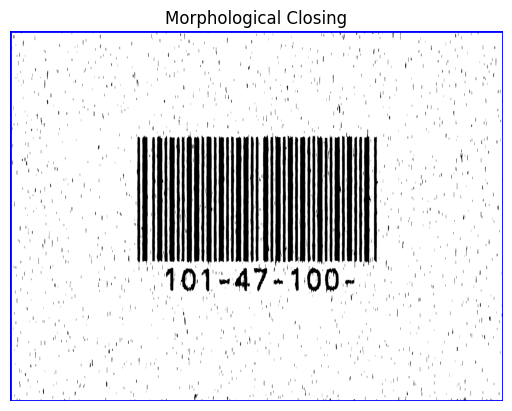

In [10]:
closed_img = cv.morphologyEx(opened_img, cv.MORPH_CLOSE, kernel1)
display_image(cv.bitwise_not(closed_img), 'Morphological Closing')

In [11]:
kernel_height2 = 1 
kernel_width2 = 5  
kernel2 = np.ones((kernel_height2, kernel_width2), np.uint8)

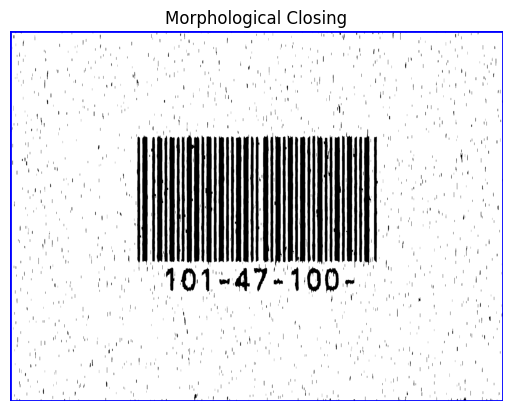

In [12]:
closed_again = cv.morphologyEx(closed_img, cv.MORPH_CLOSE, kernel2)
display_image(cv.bitwise_not(closed_again), 'Morphological Closing')

### **Cropping**

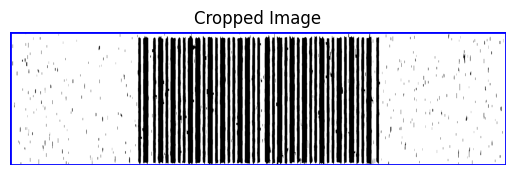

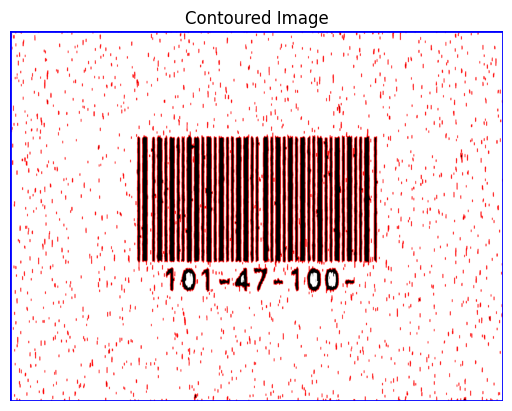

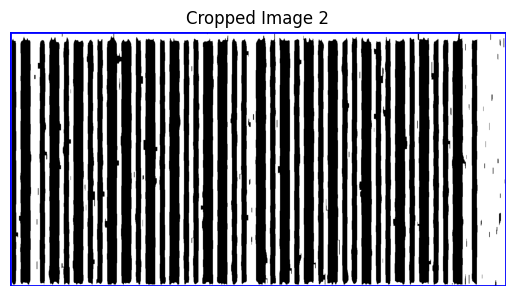

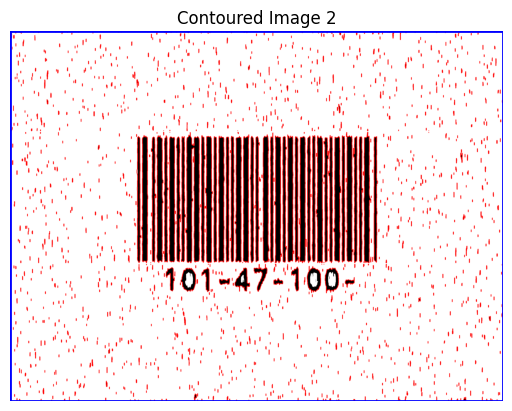

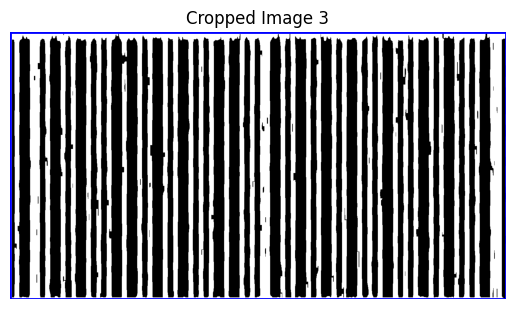

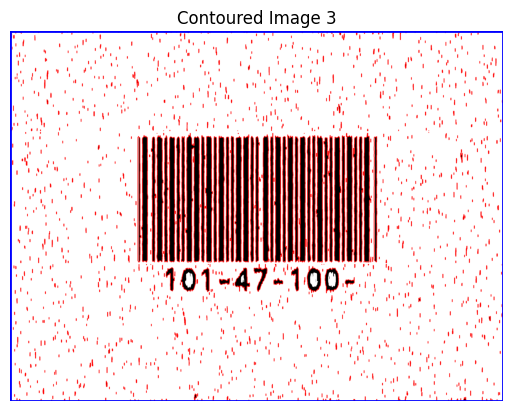

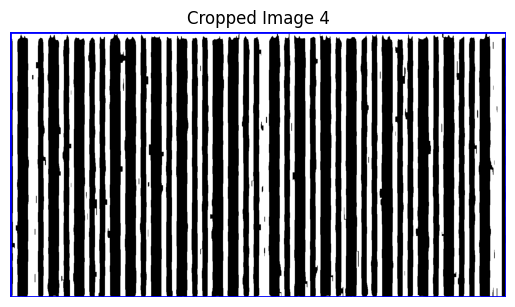

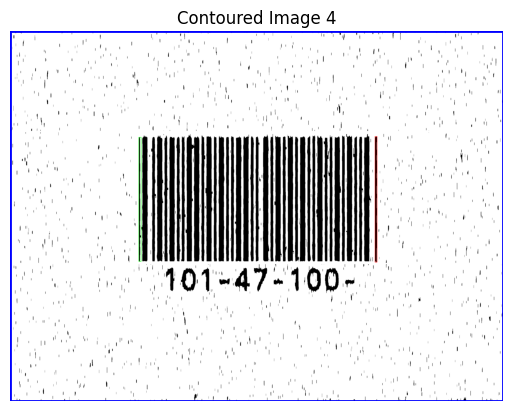

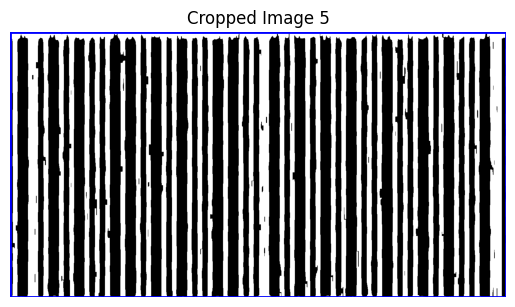

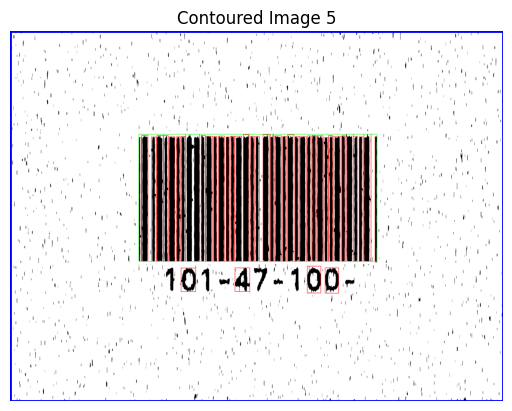

In [13]:
cropped_img, contoured_img = crop_barcode(closed_again)
display_image(cv.bitwise_not(cropped_img), 'Cropped Image')
display_image(contoured_img, 'Contoured Image')
cropped_img2, contoured_img2 = crop_barcode2(closed_again)
display_image(cv.bitwise_not(cropped_img2), 'Cropped Image 2')
display_image(contoured_img2, 'Contoured Image 2')
cropped_img3, contoured_img3 = crop_barcode3(closed_again)
display_image(cv.bitwise_not(cropped_img3), 'Cropped Image 3')
display_image(contoured_img3, 'Contoured Image 3')
cropped_img4, contoured_img4 = crop_barcode4(closed_again)
display_image(cv.bitwise_not(cropped_img4), 'Cropped Image 4')
display_image(contoured_img4, 'Contoured Image 4')
cropped_img5, contoured_img5 = crop_barcode5(closed_again)
display_image(cv.bitwise_not(cropped_img5), 'Cropped Image 5')
display_image(contoured_img5, 'Contoured Image 5')

### **Dilation**

In [18]:
# Create a vertical kernel (all 1's vertically)
kernel_vertical = np.ones((100, 1), np.uint8)  # Adjust the height as needed

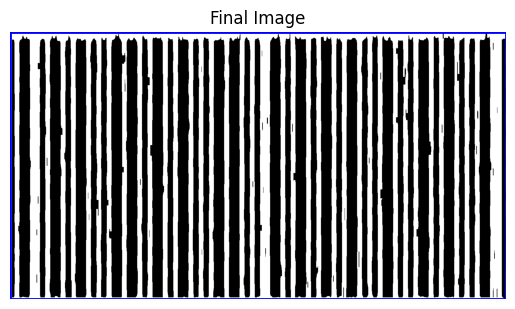

True

In [20]:
# Apply dilation with the vertical kernel
# dilated_img = cv.dilate(cropped_img4, kernel_vertical)
# display_image(cv.bitwise_not(dilated_img), 'Dilated Image')
final_img = cv.morphologyEx(cropped_img3, cv.MORPH_OPEN, kernel1)
display_image(cv.bitwise_not(final_img), 'Final Image')
# Output/Writing the final image
cv.imwrite('Outputs/output.jpg', cv.bitwise_not(final_img))